## 3D Beamforming Application

this is an app-like jupyter notebook. 


In [1]:
# import the PCD file and recording data
import open3d as o3d
import os
import glob
from data_importer import PointCloudManager, DataExtractor


"""
This block processes point cloud data and extracts audio recording data.

Returns:
- pcd_mic (open3d.geometry.PointCloud): Point cloud data from microphone.
- pcd (open3d.geometry.PointCloud): Point cloud data.
- filtered_pcd (open3d.geometry.PointCloud): Filtered point cloud data.
- recording (numpy.ndarray): Audio recording data.
"""
base_folder = "postPCD"  # dir to PCD folders
manager = PointCloudManager(base_folder)
pcd_mic, pcd, cpcd = manager.run()

extractor = DataExtractor('HP-side~0.4m-lose.mat')
recording = extractor.load_data()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Available subfolders:
0: AP-align_20231216_122743
1: AP-modify_20231208_161053
2: AP-noy-187_20231208_162247
3: AP-noy_20231208_161813
4: AP-side-0.7m-highRes_20231208_154153
5: HP-hr-0.4m-rc_20231211_150219
6: HP-rc-side_20231211_151710
7: HP-side~0.4m-hr_20231211_143359
8: HP-vvs-0.7_20231216_132553
9: HP-vvs_20231227_142812
10: test-_20231227_135151
11: vvs-20kHz-12.8k-rightEar-realigned_20231120_163043


In [2]:
%load_ext autoreload
%aimport SoundFieldAnalysis
%autoreload 1
%aimport

Modules to reload:
SoundFieldAnalysis

Modules to skip:



In [3]:
import ipywidgets as widgets
from IPython.display import display

# create a checkbox
checkbox = widgets.Checkbox(
    value=False,
    description='chooese if you want to recalculate the results',
    disabled=False,
    indent=False
)

# display the checkbox
display(checkbox)

# use a function to print the checkbox's value
def on_checkbox_change(change):
    if change['new']:  # while the checkbox is checked
        print("recalculate the results")
    else:
        print("Checkbox is False")

# get the checkbox's current value
checkbox.observe(on_checkbox_change, names='value')

Checkbox(value=False, description='chooese if you want to recalculate the results', indent=False)

recalculate the results


In [12]:
from SoundFieldAnalysis import SoundFieldAnalysis

freq = 2000
mode = 'CS'
# initialize the variables
BF_analysis = SoundFieldAnalysis(pcd_mic,recording,cpcd, freq=freq)
BF_analysis.calculate_sparse()

# inorder to avoid re-calculation of the same thing
if checkbox.value or 'result' not in globals() or freq != globals()['freq_s'] or mode != globals()['mode_s']:
    result = BF_analysis.gen_result(mode)
    freq_s = freq
    mode_s = mode

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Jan 03 10:22:10 AM: Your problem has 53750 variables, 3 constraints, and 0 parameters.
(CVXPY) Jan 03 10:22:10 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 03 10:22:10 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 03 10:22:10 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 03 10:22:10 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 03 10:22:10 AM: Compiling problem (target solver=ECOS).
(

Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ZHLI\AppData\Local\Temp\ipykernel_13304\3457347933.py", line 11, in <module>
    result = BF_analysis.gen_result(mode)
  File "c:\ZIM\MasterThesisProject\Stage4\3d_beamforming\SoundFieldAnalysis.py", line 263, in gen_result
    result_J = self.CS()
  File "c:\ZIM\MasterThesisProject\Stage4\3d_beamforming\SoundFieldAnalysis.py", line 176, in CS
    result = prob.solve(solver=cp.ECOS, max_iters=max_iters, verbose=True, eps = 1e-5)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\cvxpy\problems\problem.py", line 503, in solve
    return solve_func(self, *args, **kwargs)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\cvxpy\problems\problem.py", line 1082, in _solve
    solution = solving

In [115]:
import pcd_aligner
# modify the model
cpcd_path = f"{manager.directory}/model_2.ply"
mic_path = f"{manager.directory}/model_0.ply"
processor = pcd_aligner.PointCloud_PreProcessor(cpcd_path)
cpcd = processor.pcd_crop(pcd = cpcd, save = True)

For point selecting
1) Please pick points using [shift + left click]
   Press [shift + right click] to undo point picking
2) After picking points, press 'Q' to close the window
For crop the model
Press Y to switch to the ortho view, 
 K to lock the view and pick cropping area 
 C to crop 
 F to free view

 After picking points, press Q to quit, cropped model will be saved in variable "pcd"
[Open3D INFO] Picked point #26269 (0.081, 0.11, 0.23) to add in queue.
[Open3D INFO] Picked point #30103 (0.033, 0.058, 0.23) to add in queue.
[Open3D INFO] Picked point #10972 (0.042, 0.029, 0.21) to add in queue.
[Open3D INFO] Picked point #18265 (0.099, 0.00020, 0.21) to add in queue.


In [118]:
import numpy as np

freq_list = BF_analysis.get_freq_list(freq_range=[200, 8000])

points_np = np.asarray(cpcd.points)
picked_points_index = processor.vis.get_picked_points()
picked_points = points_np[picked_points_index]
single_point_pcd = o3d.geometry.PointCloud()

# store the picked points in a point cloud
single_point_pcd.points = o3d.utility.Vector3dVector(picked_points)

result_muti = []
for freq in freq_list:
    # set the current frequency
    BF_analysis.freq = freq
    mode = 'MUSIC1'
    # initialize the variables
    BF_analysis = SoundFieldAnalysis(pcd_mic,recording,single_point_pcd, freq=freq)
    result = BF_analysis.gen_result(mode)
    result_muti.append(result)
    

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [9]:
# write the modification to the file
o3d.io.write_point_cloud(cpcd_path, cpcd)
o3d.io.write_point_cloud(mic_path, pcd_mic)

True

In [7]:
# align the pcd coordinates
cpcd, picked_points = processor.coordinates_align()

origin = processor.apply_rotation(pcd_mic, picked_points)
# apply translation
pcd_mic = processor.apply_translation(pcd_mic, origin)

For point selecting
1) Please pick points using [shift + left click]
   Press [shift + right click] to undo point picking
2) After picking points, press 'Q' to close the window
For crop the model
Press Y to switch to the ortho view, 
 K to lock the view and pick cropping area 
 C to crop 
 F to free view

 After picking points, press Q to quit, cropped model will be saved in variable "pcd"
[Open3D INFO] Picked point #40079 (0.17, 0.11, -0.12) to add in queue.
[Open3D INFO] Picked point #7239 (0.035, 0.082, -0.13) to add in queue.
[Open3D INFO] Picked point #38770 (0.094, -0.025, -0.085) to add in queue.

Picked points: [(0.17, 0.11, -0.12), (0.035, 0.082, -0.13), (0.094, -0.025, -0.085)]


In [8]:
o3d.visualization.draw_geometries([cpcd, processor.mesh_frame, pcd_mic])

In [10]:
# plot the result
plotter, p_range = BF_analysis.plot(result, dynamic_range=30, plot_mesh = True, opacity=None)
# plotter.add_title(f"Beamforming result at {freq} Hz")
plotter.show()

Widget(value="<iframe src='http://localhost:51239/index.html?ui=P_0x1674bbb3640_2&reconnect=auto' style='width…

In [61]:


plotter_add_slice, cloud = BF_analysis.add_slicer(plotter, mode, p_range = p_range, plane='yz', 
                                           center = [0.1,0.2],position=0.1, 
                                           size=[0.5, 0.4], plot_mesh=False,
                                           dynamic_range=20)


                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Jan 02 11:50:03 PM: Your problem has 10000 variables, 1 constraints, and 0 parameters.
(CVXPY) Jan 02 11:50:03 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 02 11:50:03 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 02 11:50:03 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 02 11:50:03 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 02 11:50:03 PM: Compiling problem (target solver=ECOS).
(

SolverError: Solver 'ECOS' failed. Try another solver, or solve with verbose=True for more information.

In [60]:
import pyvista as pv
plotter_plane = pv.Plotter()
plotter_plane.add_mesh(cloud, cmap='rainbow', scalars='Sound Pressure(dB)',show_scalar_bar = True, point_size = 6)
plotter_plane.show()

Task exception was never retrieved
future: <Task finished name='Task-1607' coro=<WslinkHandler.sendWrappedMessage() done, defined at c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\wslink\protocol.py:423> exception=ConnectionResetError('Cannot write to closing transport')>
Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\asyncio\tasks.py", line 232, in __step
    result = coro.send(None)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\wslink\protocol.py", line 477, in sendWrappedMessage
    await ws.send_bytes(attachments[key])
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\web_ws.py", line 343, in send_bytes
    await self._writer.send(data, binary=True, compress=compress)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 721, in send
    await self._send_frame(message, WSMsgT

Widget(value="<iframe src='http://localhost:49552/index.html?ui=P_0x1b488ce93f0_21&reconnect=auto' style='widt…

 JS Error => Malformed message:  {"wslink": "1.0", "id": "publish:trame.vtk.delta:0", "result": {"parent": "0x0", "id": 22, "type": "vtkWin32OpenGLRenderWindow", "properties": {"numberOfLayers": 2}, "dependencies": [{"parent": "000001b43d744c50", "id": "000001b4afb3e120", "type": "vtkOpenGLRenderer", "properties": {"background": [1.0, 1.0, 1.0], "background2": [0.2, 0.2, 0.2], "viewport": [0.0, 0.0, 1.0, 1.0], "twoSidedLighting": 1, "lightFollowCamera": 1, "layer": 0, "preserveColorBuffer": 0, "preserveDepthBuffer": 0, "nearClippingPlaneTolerance": 0.001, "clippingRangeExpansion": 0.5, "useShadows": 0, "useDepthPeeling": 0, "occlusionRatio": 0.0, "maximumNumberOfPeels": 4, "interactive": 1}, "dependencies": [{"parent": "000001b4afb3e120", "id": "000001b411a53ad0", "type": "vtkOpenGLCamera", "properties": {"focalPoint": [0.1, 0.09999999999999999, 0.2], "position": [0.8141757092628397, 0.8141757092628397, 0.9141757092628398], "viewUp": [0.0, 0.0, 1.0], "clippingRange": [0.707601561775719

In [98]:
processor.pcd_crop()

Task exception was never retrieved
future: <Task finished name='Task-1566' coro=<WebSocketWriter.ping() done, defined at c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py:705> exception=ConnectionResetError('Cannot write to closing transport')>
Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\asyncio\tasks.py", line 232, in __step
    result = coro.send(None)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 709, in ping
    await self._send_frame(message, WSMsgType.PING)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 686, in _send_frame
    self._write(header + message)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 696, in _write
    raise ConnectionResetError("Cannot write to closing transport

NameError: name 'processor' is not defined

In [34]:
import ipywidgets as widgets
from IPython.display import display

# 步骤 1：存储结构
results = {}

# 步骤 2：执行计算
# 假设 add_slicer 返回计算结果
for plane in ['xy', 'yz']:
    for position in [0, 0.2, 0.4]:
        # 根据参数进行计算
        plotter, cloud = BF_analysis.add_slicer(plotter, mode, plane=plane, 
                                                center=[0.1, 0.1], position=position, 
                                                size=[0.5, 0.4], plot_mesh=False,
                                                dynamic_range=40)
        # 存储结果
        results[(plane, position)] = (plotter, cloud)

# 步骤 3：创建下拉菜单
dropdown = widgets.Dropdown(
    options=[(f'Plane: {k[0]}, Position: {k[1]}', k) for k in results.keys()],
    description='Select:',
    disabled=False,
)

# 步骤 4：定义响应函数
def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # 获取选中的结果
        plotter, cloud = results[change['new']]
        # 显示结果
        plotter.show()  # 或其他适合的显示方法

# 绑定响应函数
dropdown.observe(on_dropdown_change, names='value')

# 显示下拉菜单
display(dropdown)

Task exception was never retrieved
future: <Task finished name='Task-518' coro=<WebSocketWriter.ping() done, defined at c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py:705> exception=ConnectionResetError('Cannot write to closing transport')>
Traceback (most recent call last):
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\asyncio\tasks.py", line 232, in __step
    result = coro.send(None)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 709, in ping
    await self._send_frame(message, WSMsgType.PING)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 686, in _send_frame
    self._write(header + message)
  File "c:\Users\ZHLI\AppData\Local\anaconda3\envs\jpylab-env\lib\site-packages\aiohttp\http_websocket.py", line 696, in _write
    raise ConnectionResetError("Cannot write to closing transport"

Dropdown(description='Select:', options=(('Plane: xy, Position: 0', ('xy', 0)), ('Plane: xy, Position: 0.2', (…

A view with name (P_0x1a479990ac0_6) is already registered
 => returning previous one


Widget(value="<iframe src='http://localhost:65488/index.html?ui=P_0x1a479990ac0_6&reconnect=auto' style='width…

In [46]:
plotter_add_slice.show()

A view with name (P_0x1c5a4e4a020_22) is already registered
 => returning previous one


Widget(value="<iframe src='http://localhost:53282/index.html?ui=P_0x1c5a4e4a020_22&reconnect=auto' style='widt…

TypeError: object of type 'int' has no len()

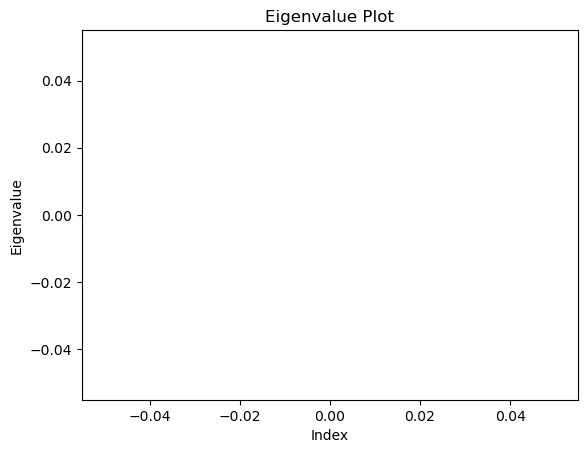

In [60]:
import matplotlib.pyplot as plt

eigenval = BF_analysis.eigVal
plt.plot(eigenval)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue Plot')
plt.xticks(range(len(eigenval)), range(len(eigenval)))
plt.show()

